- Similar to how AdaBoost works, but makes use of the residual error. 
- Allows for larger decision trees to be made; the learning rate (coefficent) is the same for each of the weak learners
- Training based on the residuals: from the previous model, we will calcualte the error, and then we will create a new model which attempts to predict the expected error. The error value that this second model produces, will then be added to the prediction from the first model -> leads to a more accurate prediction
- Does not overfit easily, need to have lots of trees inorder to overfit
- We will spend a lot of time training, since the learning rate is between 0-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [5]:
y = df["class"]
X = pd.get_dummies(df.drop("class", axis=1), drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
model = GradientBoostingClassifier()

In [10]:
n_estimators = [50, 100] 
learning_rate = [0.1, 0.05, 0.2]
max_depth = [3, 4, 5]
param_grid = {"n_estimators":n_estimators, "learning_rate":learning_rate, "max_depth":max_depth}

In [11]:
grid = GridSearchCV(model, param_grid)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [14]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [16]:
preds = grid.predict(X_test)

In [17]:
accuracy_score(y_test, preds)

1.0

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [22]:
feat_import = grid.best_estimator_.feature_importances_

In [23]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=["Importance"])

In [39]:
imp_feat = imp_feat[imp_feat["Importance"] > 0.0005]

In [40]:
imp_feat = imp_feat.sort_values("Importance")

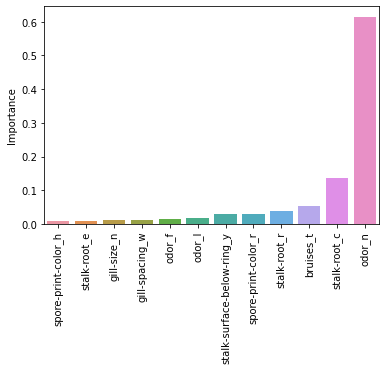

In [41]:
sns.barplot(data=imp_feat, x=imp_feat.index, y=imp_feat["Importance"])
plt.xticks(rotation=90);